# Semaine 10 les reseaux de neurone



## Data Set

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:

000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

## Creer un Neural Network - Binary Classification

Dans cet exercice, nous allons réaliser une classification binaire entre les chiffres 0 et 1  du data set mnist.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(42)

### 1 Dataset Preparation

Chargement du dataset

In [5]:
train = pd.read_csv("src/train.csv")
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Inclure seulement les chiffres avec les labels 0 et 1
# (man .isin)
X = train.loc[train.loc[:, 'label'].isin([0, 1]), :]

# Supprimer la colonne label
X = X.loc[:, 'pixel0':'pixel783']
X
# construisons Y a partir de la colone label
Y = train[train['label'].isin([0, 1])]['label']
Y = Y[:,np.newaxis]

# on transpose X et Y pour etre au format colone
Y = Y.T
X = X.T

Regardons ce que ca donne !

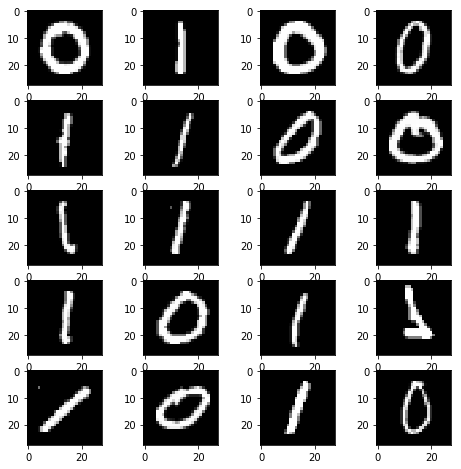

In [21]:
# On va afficher quelques exemples des images sur lesquelles vous allez travailler

fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    X1 = X.T.iloc[i]
    X1 = X1.values.reshape(28,28)
    fig.add_subplot(rows, columns, i)
    plt.imshow(X1, cmap='gray')
plt.show()

In [22]:
print("X", X.shape)
print("Y", Y.shape)

X (784, 8816)
Y (1, 8816)


### Resultats

Les resultats devraient etre pour X et Y devraient être deux matrices de dimensions respectives

X (784, 8816) <br>
Y (1, 8816)

784 etant le nombre d'input (chaques pixels allant de 0 a 255 en intensité lumineuse) <br>
8816 le nombre de training examples. <br>
On retrouve ici les matrices en colones plutot qu'en ligne <br>
Si on print Y on obtient une serie de 0 et de 1 (le label)

In [23]:
print(Y)

[[1 0 1 ... 1 0 1]]


### 2 Fonction d'activation

We will use sigmoid activation function because it outputs the values between 0 and 1 so its a good choice for a binary classification problem

In [29]:
# Si 'derivative' == True, alors retourner le resultat de la fonction derivée
def sigmoid(x, derivative=False):
    sig_result = 1 / (1 + np.exp(-x))
    if (derivative == False):
        return sig_result
    return (sig_result * (1 - sig_result))

### Resultats

On peut verifier son resultat avec les valeurs connues de la fontion sigmoid comme : <br>
sigmoid(0) = 0.5 <br>
sigmoid(0, derivative = True) = 0.25 <br>


In [30]:
print(sigmoid(0))
print(sigmoid(0, derivative = True))

0.5
0.25


### 3 Defirnir l'Architecture de notre NN

Nous voulons creer ici une architecture pour notre reseau de neurone : combien de layers ? d'units pour chaque layer ect ... <br>
<br>
Nous commencerons par un reseau a 2 layers : 1 input layer, 1 hidden layer et 1 output layer : <br>
 - Un input de 784 (le nombre de feature pour chaque image) <br>
 - 10 unités dans le hidden layer <br>
 - Seulement une unité dans l'output layer qui vaudra zero si notre image represente un 0 et ... 1 si c'est un 1 !


In [31]:
def network_architecture(X, Y):
    # nodes in input layer
    n_x = X.shape[0]
    # nodes in hidden layer
    n_h = 10         
    # nodes in output layer
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

n_x, n_h, n_y = network_architecture(X, Y)
print ("n_x", n_x)
print ("n_h", n_h)
print ("n_y", n_y)

n_x 784
n_h 10
n_y 1


### 4 Definir les parametres de notre reseau de neurone

Afin d'initialiser aleatoirement nos poids on va utiliser une fonction de numpy qui initialise une matrice de dimension de notre choix avec des nombres issues d'une distribution normale que l'on mettra a l'echelle 0.01

In [39]:
def define_network_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.001 # random initialization between inputs and node of hidden layer, remettre à l'echelle en multipliant par 0.01
    b1 = np.zeros((n_h, 1)) # zeros initialization
    W2 = np.random.randn(n_y, n_h) * 0.001 # random initialization, remettre à l'echelle en multipliant par 0.01
    b2 = np.zeros((n_y, 1)) # zero initialization

    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

On devrait avoir les dimensions suivantes : <br>
w1 (10, 784)<br>
b1 (10, 1)<br>
w2 (1, 10)<br>
b2 (1, 1)


Et puis ca ne fait jamais de mal de visualiser de temps en temps ;)

In [44]:
n_x, n_h, n_y = network_architecture(X, Y)

params = define_network_parameters(n_x, n_h, n_y)
print ("W1", params['W1'].shape)
print ("b1", params['b1'].shape)
print ("W2", params['W2'].shape)
print ("b2", params['b2'].shape)

W1 (10, 784)
b1 (10, 1)
W2 (1, 10)
b2 (1, 1)


### 5 Forward Propagation

Pour rappel :
    Z = W*X + b </br>
    A = g(Z)

In [47]:
# Pour rappel Z = W*X + b   & A = g(Z)

def forward_propagation(X, params):
    Z1 = np.dot(params['W1'], X) + params['b1']
    A1 = sigmoid(Z1)

    Z2 = np.dot(params['W2'], A1) + params['b2']
    A2 = sigmoid(Z2)
    
    return {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

### Resultats

On peut au moins verifier la forme des matrices calculées : <br>
Z1  (10, 8816)<br>
A1  (10, 8816)<br>
Z2  (1, 8816) <br>
A2  (1, 8816) <br>

In [48]:
refor = forward_propagation(X, params)

print("Z1", refor['Z1'].shape)
print("A1", refor['A1'].shape)
print("Z2", refor['Z2'].shape)
print("A2", refor['A2'].shape)

Z1 (10, 8816)
A1 (10, 8816)
Z2 (1, 8816)
A2 (1, 8816)


### 6 Backward Propagation

In backward propagation function, the error is passed backward to previous layers and the derivatives of weights and bias are computed. The weights and bias are then updated using the derivatives.  

In [51]:
def backward_propagation(params, activations, X, Y):
    m = X.shape[1]
    
    # output layer
    dZ2 =  activations['A2'] - Y # compute the error derivative 
    dW2 =  (1 / m) * dZ2.dot(activations['A1'].T) # compute the weight derivative 
    db2 =  (1 / m) * np.sum(dZ2, axis=1, keepdims=True) # compute the bias derivative
    
    # hidden layer, la meme chose avec une nouvelle methode de calcul pour dZ1
    dZ1 = params['W2'].T.dot(dZ2) * sigmoid(activations['Z1'], derivative=True)
    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

def update_parameters(params, derivatives, alpha = 1):
    # alpha is the model's learning rate 
    
    params['W1'] = params['W1'] - alpha * derivatives['dW1']
    params['b1'] = params['b1'] - alpha * derivatives['db1']
    params['W2'] = params['W2'] - alpha * derivatives['dW2']
    params['b2'] = params['b2'] - alpha * derivatives['db2']
    return params

Encore une fois la meilleure verification consiste a verifier ses dimensions et a jeter un oeuil a son resultat :)

In [52]:
params = update_parameters(params, backward_propagation(params, refor, X, Y))
print(params)

{'W1': array([[-6.63745639e-04, -4.52525140e-04,  2.49307532e-04, ...,
        -5.80159997e-04, -4.92797617e-04, -3.89772401e-04],
       [ 5.53302763e-04,  2.73022151e-03, -7.53827201e-06, ...,
         1.18650557e-05, -1.51005359e-03, -3.28458898e-04],
       [ 2.13738073e-04, -2.06013055e-03,  5.40685413e-05, ...,
        -1.07671989e-03,  1.88058133e-03,  2.19448811e-03],
       ...,
       [ 9.15698867e-04,  2.19959551e-03, -9.29898236e-04, ...,
         4.05544407e-04, -5.34596089e-04,  8.69130363e-04],
       [ 2.89235344e-06,  3.25278989e-04, -2.38397890e-03, ...,
         6.22735330e-04,  8.40926022e-04,  1.10365441e-03],
       [ 2.47390408e-04, -7.62580131e-04,  8.90946725e-05, ...,
        -4.94474938e-04,  2.24311368e-03, -8.44281484e-05]]), 'b1': array([[ 1.37735382e-04],
       [ 2.81969099e-04],
       [ 5.02168246e-03],
       [ 1.82766698e-04],
       [-4.01856448e-03],
       [-9.59217383e-05],
       [-1.26529210e-03],
       [ 5.61631605e-04],
       [-5.68174548e-

In [57]:
def compute_error(Predicted, Actual):
    distances = (Predicted - Actual)**2
    cost = (1 / (2 * Predicted.shape[0]) * np.sum(distances))
    return cost

### 7 Compile et entrainner le Model

Create a function which compiles all the key functions and creates a neural network model.

Maintenant que l'on a posé une à unes les pierres de notre algorithme il est temps de prendre un peu de recul pour verifier que tout s'articule et fonctionne de manière harmonieuse : <br>
 - Il faut definir l'architecture de notre reseau
 - initialiser nos parametres
 - puis pour un nombre donné d'époques on fait une prediction de resultat puis on affine nos parametres (gradient descent) ... notre algorithme "apprend" <br>
 ### Optionnel
 Vous pouvez egalement creer une fonction qui permet de calculer le cout à chaque iteration, cela vous permettra d'etre sur que vous etre bien arrivé à converger.  

In [58]:
def neural_network(X, Y, num_iterations):
    #on definit l'architecture de notre reseau
    n_x, n_h, n_y = network_architecture(X, Y)
    #on en profite pour initialiser aleatoirement nos parametres
    params = define_network_parameters(n_x, n_h, n_y)
    #on initialise le tableau contenant les coûts
    J = []
    #puis on boucle
    for i in range(num_iterations):
        activations = forward_propagation(X, params)
        J.append(compute_error(activations['A2'], Y))
        derivatives = backward_propagation(params, activations, X, Y)
        params = update_parameters(params, derivatives)
    return params, J

On se lance maintenant !

In [59]:
model, J = neural_network(X, Y, num_iterations = 300)

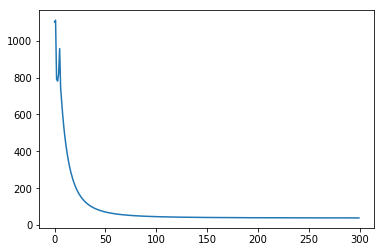

In [62]:
#Visualizing the evolution of the cost:
fit = plt.figure()
ax = plt.axes()
ax.plot(J)

### 8 Predictions 

La fonction predict va nous permettre a partir de nos parametres fraichement affinés de formuler avec une n-ième forward-propagation la fiabilité de nos predictions sur notre training set

In [63]:
def predict(parameters, X):
    results = forward_propagation(X, parameters)
    predictions = np.around(results['A2'])    
    return predictions

predictions = predict(model, X)

In [70]:
#Error va contenir l'index (sur nos 8860 training examples) des exemples ou notre algorithme s'est trompé

Error = []
for i in range(Y.shape[1]):
    #on remplit error
    if (Y[0][i] != predictions[0][i]):
        Error.append(i)

In [71]:
print ('Accuracy: %f' % float((float(X.shape[0]) - float(len(Error))) / float(X.shape[0]) * 100) + '%')  

Accuracy: 90.051020%


### 9 Visualisations 

alors c'etait fun ? On s'est bien amusés a travailler cet atelier et on espere que vous aussi. Merci pour votre patience et votre investissement avant de vous laisser, voila la visualisation des chiffres que vous reseau de neurone à mal classifié !<br>


ValueError: num must be 1 <= num <= 20, not 21

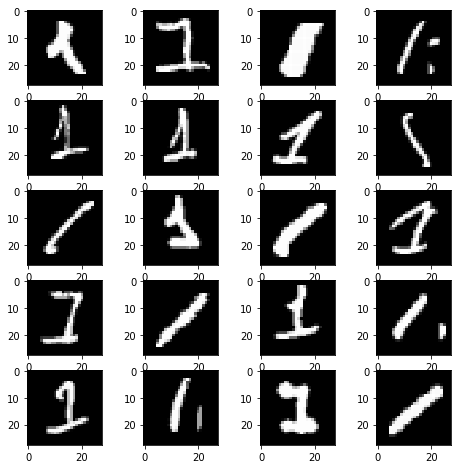

In [72]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, len(Error)+1):
    
    X1 = X.T.iloc[Error[i-1]]
    X1 = X1.values.reshape(28,28)
    fig.add_subplot(rows, columns, i)
    plt.imshow(X1, cmap='gray')
plt.show()

## Pour aller plus loin

Pleins de possibilite d'amelioration
- Permettre une classification multivariable
- Permettre de rajouter plusieurs Layers
- Decoupter notre dataset pour faire de la cross validation.
